In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Algerian_forest_fires_dataset_UPDATE.csv', header=1)

In [3]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


# Data Cleaning

In [4]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [5]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

In [6]:
df['Region'] = df['Region'].astype(int)

In [7]:
df.columns = df.columns.str.strip()

In [8]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [9]:
df.reset_index(drop=True, inplace=True)

In [10]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [11]:
df.iloc[121:124]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
121,30,09,2012,25,78,14,1.4,45,1.9,7.5,0.2,2.4,0.1,not fire,0
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
123,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [12]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN,1


In [13]:
df.drop(index=[122,123,167],inplace=True, axis=0)

In [14]:
df.reset_index(drop=True, inplace=True)

In [15]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [16]:
df[['Temperature','RH','Ws','day','month','year']] = df[['Temperature','RH','Ws','day','month','year']].astype(int) 

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          243 non-null    int64 
 1   month        243 non-null    int64 
 2   year         243 non-null    int64 
 3   Temperature  243 non-null    int64 
 4   RH           243 non-null    int64 
 5   Ws           243 non-null    int64 
 6   Rain         243 non-null    object
 7   FFMC         243 non-null    object
 8   DMC          243 non-null    object
 9   DC           243 non-null    object
 10  ISI          243 non-null    object
 11  BUI          243 non-null    object
 12  FWI          243 non-null    object
 13  Classes      243 non-null    object
 14  Region       243 non-null    int64 
dtypes: int64(7), object(8)
memory usage: 28.6+ KB


In [18]:
float_items = [item for item in df.columns if df[item].dtypes=='O']

In [19]:
for item in float_items:
    if item == 'Classes':
        pass
    else:
         df[item] = df[item].astype(float)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [21]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


# Exploratory data analysis

In [22]:
df.describe()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Region
count,243.000000,243.000000,243.0,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000,243.000000
mean,15.761317,7.502058,2012.0,32.152263,62.041152,15.493827,0.762963,77.842387,14.680658,49.430864,4.742387,16.690535,7.035391,0.497942
std,8.842552,1.114793,0.0,3.628039,14.828160,2.811385,2.003207,14.349641,12.393040,47.665606,4.154234,14.228421,7.440568,0.501028
min,1.000000,6.000000,2012.0,22.000000,21.000000,6.000000,0.000000,28.600000,0.700000,6.900000,0.000000,1.100000,0.000000,0.000000
25%,8.000000,7.000000,2012.0,30.000000,52.500000,14.000000,0.000000,71.850000,5.800000,12.350000,1.400000,6.000000,0.700000,0.000000
50%,16.000000,8.000000,2012.0,32.000000,63.000000,15.000000,0.000000,83.300000,11.300000,33.100000,3.500000,12.400000,4.200000,0.000000
75%,23.000000,8.000000,2012.0,35.000000,73.500000,17.000000,0.500000,88.300000,20.800000,69.100000,7.250000,22.650000,11.450000,1.000000
max,31.000000,9.000000,2012.0,42.000000,90.000000,29.000000,16.800000,96.000000,65.900000,220.400000,19.000000,68.000000,31.100000,1.000000


In [23]:
df['Classes'] = df['Classes'].str.strip().map({'not fire':1, 'fire':0})

In [24]:
df['Classes'] = df['Classes'].astype(int)

In [25]:
df['Classes'].value_counts()

Classes
0    137
1    106
Name: count, dtype: int64

array([[<Axes: title={'center': 'day'}>,
        <Axes: title={'center': 'month'}>,
        <Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'Temperature'}>],
       [<Axes: title={'center': 'RH'}>, <Axes: title={'center': 'Ws'}>,
        <Axes: title={'center': 'Rain'}>,
        <Axes: title={'center': 'FFMC'}>],
       [<Axes: title={'center': 'DMC'}>, <Axes: title={'center': 'DC'}>,
        <Axes: title={'center': 'ISI'}>, <Axes: title={'center': 'BUI'}>],
       [<Axes: title={'center': 'FWI'}>,
        <Axes: title={'center': 'Classes'}>,
        <Axes: title={'center': 'Region'}>, <Axes: >]], dtype=object)

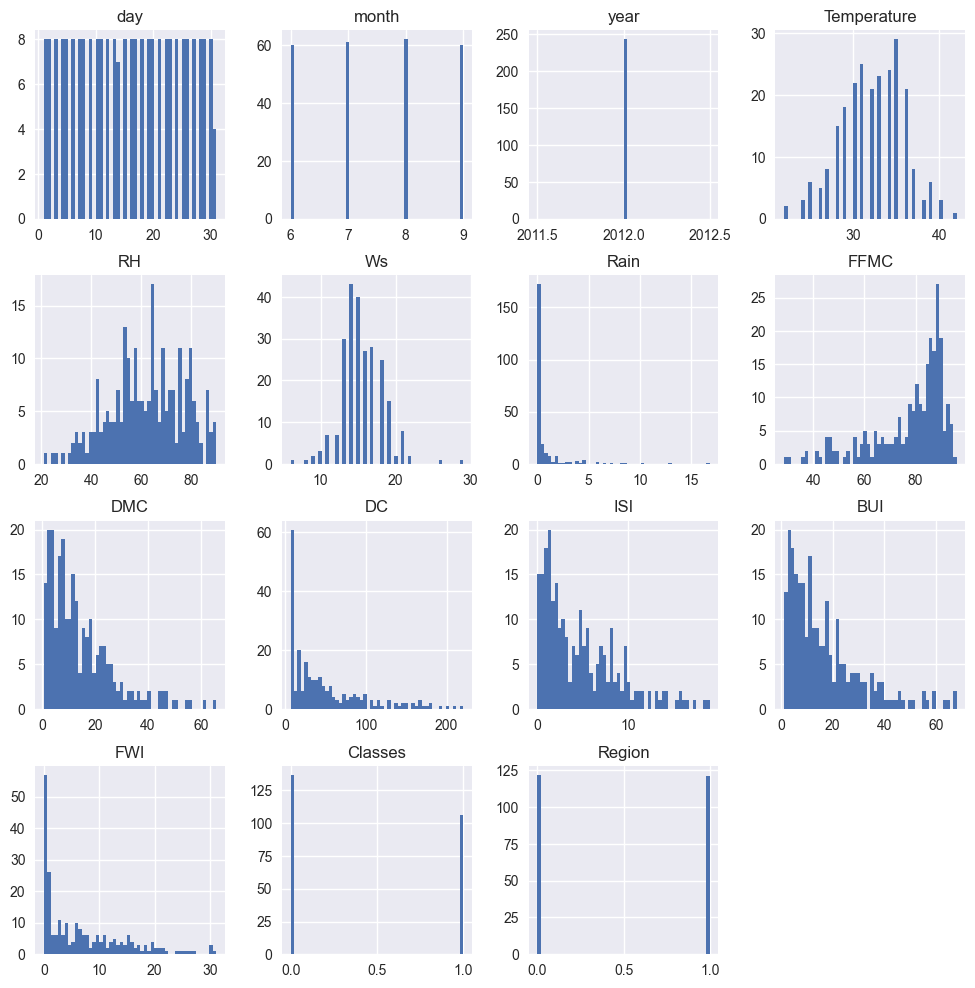

In [26]:
plt.style.use('seaborn-v0_8')
df.hist(bins=50, figsize=(12,12))

<Axes: ylabel='count'>

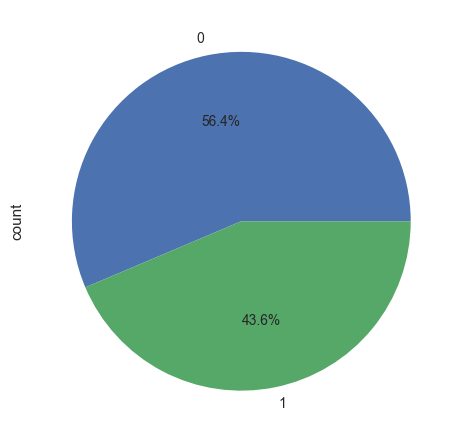

In [27]:
counts = df['Classes'].value_counts()
df['Classes'].value_counts().plot(kind='pie', autopct='%1.1f%%')

In [28]:
# Correlation
df.corr()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
day,1.000000,-0.000369,NaN,0.097227,-0.076034,0.047812,-0.112523,0.224956,0.491514,0.527952,0.180543,0.517117,0.350781,-0.202840,0.000821
month,-0.000369,1.000000,NaN,-0.056781,-0.041252,-0.039880,0.034822,0.017030,0.067943,0.126511,0.065608,0.085073,0.082639,-0.024004,0.001857
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Temperature,0.097227,-0.056781,NaN,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,-0.516015,0.269555
RH,-0.076034,-0.041252,NaN,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,0.432161,-0.402682
Ws,0.047812,-0.039880,NaN,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,0.069964,-0.181160
Rain,-0.112523,0.034822,NaN,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,0.379097,-0.040013
FFMC,0.224956,0.017030,NaN,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,-0.769492,0.222241
DMC,0.491514,0.067943,NaN,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,-0.585658,0.192089
DC,0.527952,0.126511,NaN,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,-0.511123,-0.078734


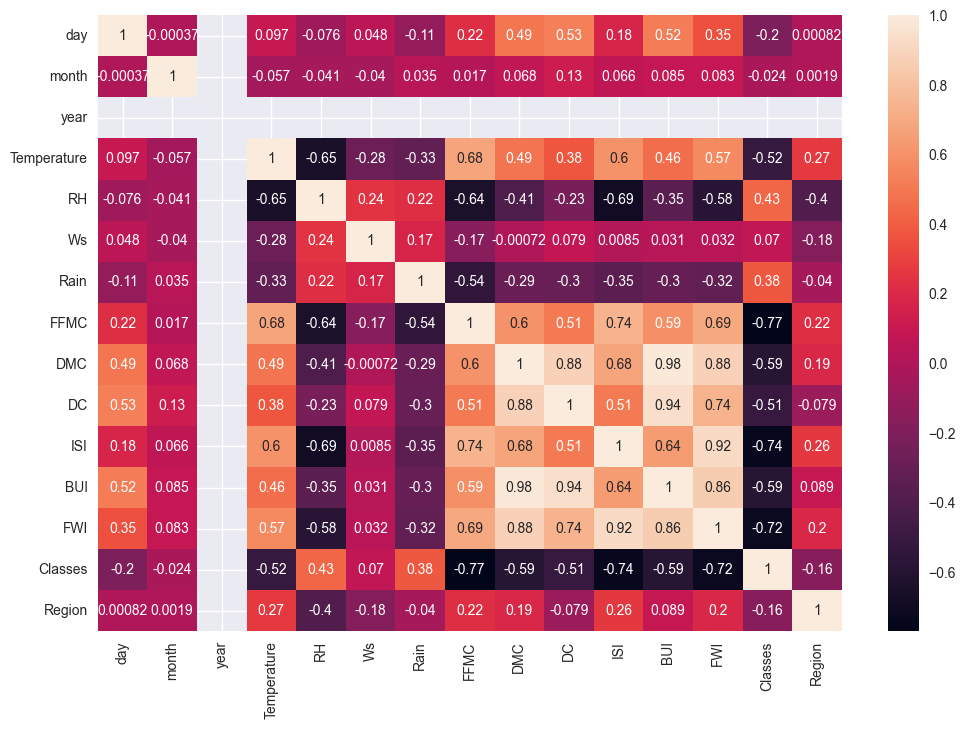

In [29]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

<Axes: xlabel='month', ylabel='count'>

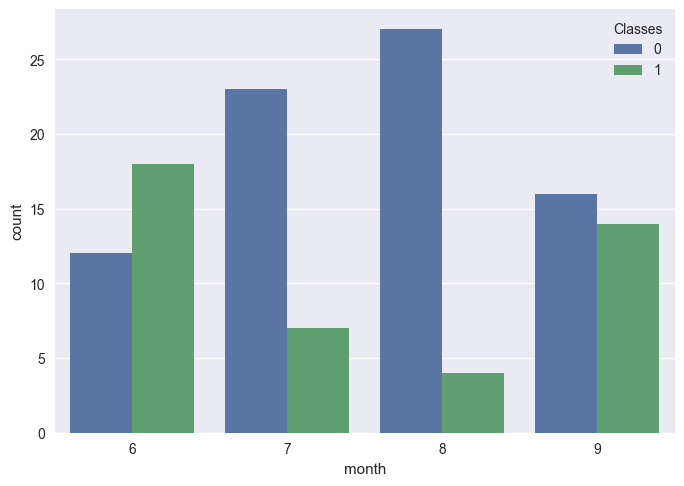

In [30]:
sns.countplot(data=df[df['Region']==1], x='month',hue='Classes')

<Axes: xlabel='month', ylabel='count'>

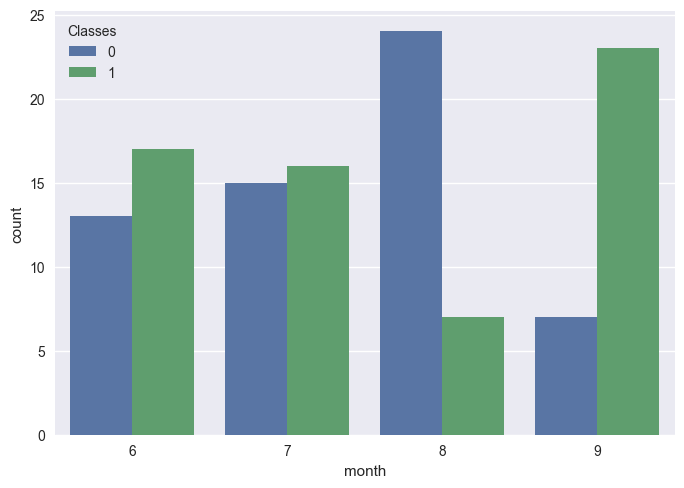

In [31]:
sns.countplot(data=df[df['Region']==0], x='month',hue='Classes')

# Model Training

In [32]:
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [33]:
df.drop(columns=['day','month','year'],inplace=True,axis=1)

In [34]:
df.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,1,0


In [35]:
# Independent and Dependent feature

X = df.drop(columns=['FWI'],axis=1)
y = df['FWI']

In [36]:
X.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,1,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,1,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,1,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,1,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,1,0


In [37]:
# train test split 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25 , random_state=42)

In [38]:
x_train.shape

(182, 11)

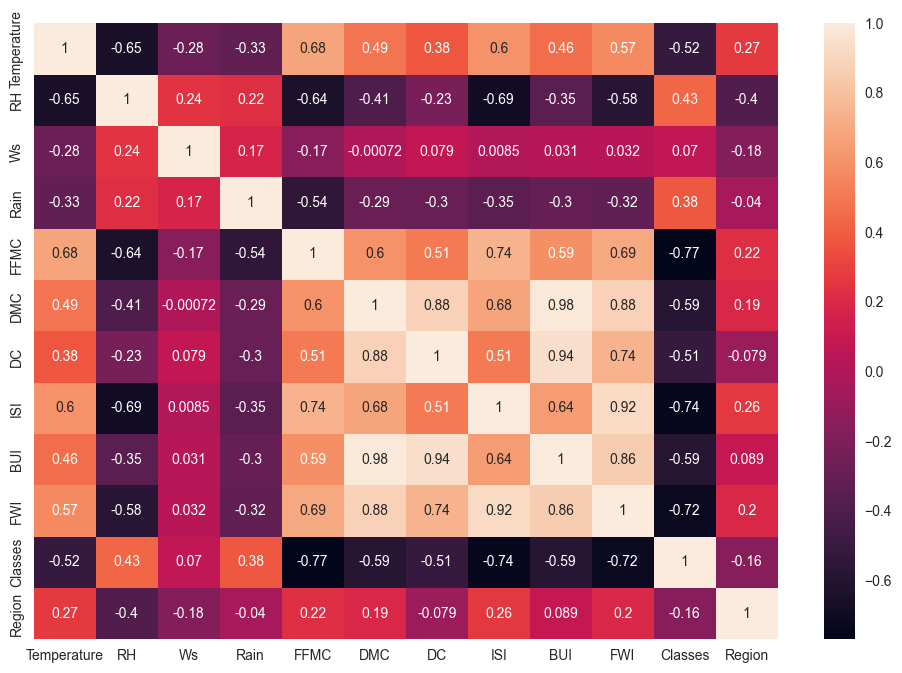

In [39]:
# Check multicollinearity
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True)
plt.show()


In [40]:
def corr_check(threshold):
    final_list = set()
    for i in range(len(df.corr().columns)):
        for j in range(i):
            if abs(df.corr().iloc[i,j]) > threshold and df.corr().columns[i] != 'FWI':
                final_list.add(df.corr().columns[i])
    return final_list

In [41]:
corr_check(0.85)

{'BUI', 'DC'}

In [42]:
x_train.drop(columns=corr_check(0.85), inplace=True, axis=1)
x_test.drop(columns=corr_check(0.85), inplace=True, axis=1)

In [43]:
x_train.shape, x_test.shape

((182, 9), (61, 9))

In [44]:
from sklearn.preprocessing import StandardScaler
scalar = StandardScaler()

x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

# Box Plot for outliers

<Axes: >

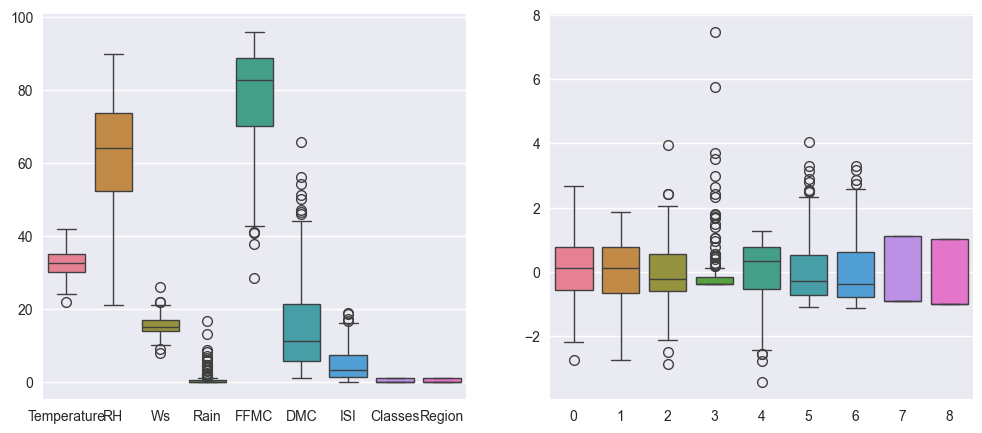

In [45]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(x_train)
plt.subplot(1,2,2)
sns.boxplot(x_train_scaled)

# Linear Regression Model

The Accuracy of the Linear Regression : 0.9847657384266951 and the loss 0.6742766873791577


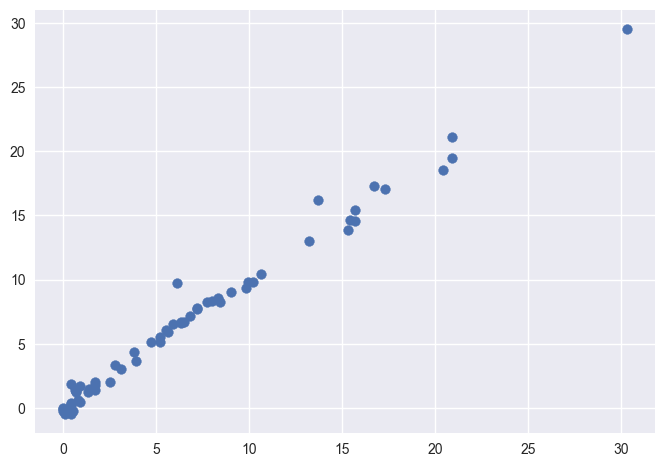

In [46]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

LR = LinearRegression()

LR.fit(x_train_scaled, y_train)

y_pred = LR.predict(x_test_scaled)

mse =  mean_squared_error(y_true=y_test, y_pred=y_pred)

Score = r2_score(y_pred=y_pred, y_true=y_test)

print(f'The Accuracy of the Linear Regression : {Score} and the loss {mse}')

plt.scatter(x=y_test, y=y_pred)

The Accuracy of the Linear Regression : 0.9837365646602719 and the loss 0.7198284769832834


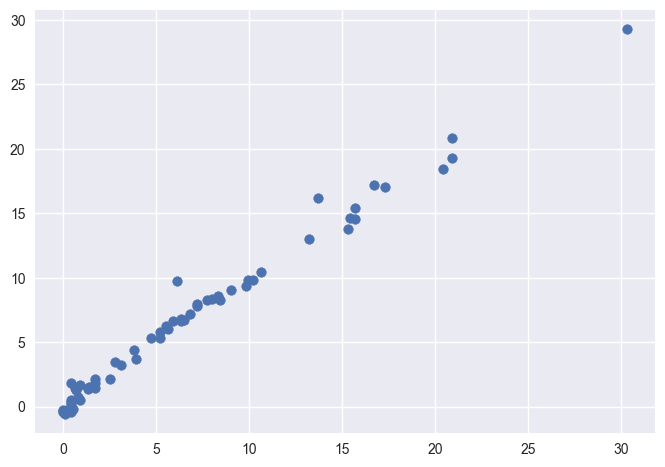

In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

RidgeR = Ridge(alpha=2)

RidgeR.fit(x_train_scaled, y_train)

y_pred = RidgeR.predict(x_test_scaled)

mse =  mean_squared_error(y_true=y_test, y_pred=y_pred)

Score = r2_score(y_pred=y_pred, y_true=y_test)

print(f'The Accuracy of the Linear Regression : {Score} and the loss {mse}')

plt.scatter(x=y_test, y=y_pred)

The Accuracy of the Linear Regression : 0.8852957623500172 and the loss 5.0768718272837114


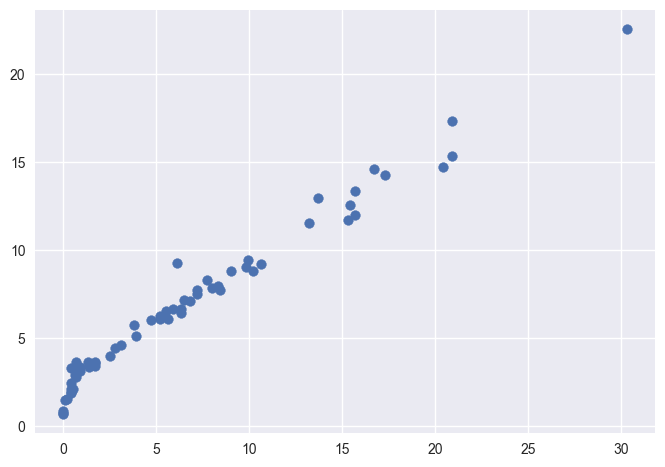

In [48]:
from sklearn.linear_model import Lasso
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

LassoR = Lasso(alpha=2)

LassoR.fit(x_train_scaled, y_train)

y_pred = LassoR.predict(x_test_scaled)

mse =  mean_squared_error(y_true=y_test, y_pred=y_pred)

Score = r2_score(y_pred=y_pred, y_true=y_test)

print(f'The Accuracy of the Linear Regression : {Score} and the loss {mse}')

plt.scatter(x=y_test, y=y_pred)

In [49]:
LassoR.coef_

array([ 0.        , -0.        ,  0.        , -0.        ,  0.        ,
        2.39685238,  3.41511491, -0.        ,  0.        ])

In [50]:
RidgeR.coef_

array([-0.01760628, -0.23323157,  0.04294502, -0.04021741, -0.74933907,
        3.66683794,  4.65509319, -0.46192597, -0.37687224])

The Accuracy of the Linear Regression : 0.7772100217302564 and the loss 9.860805383060583


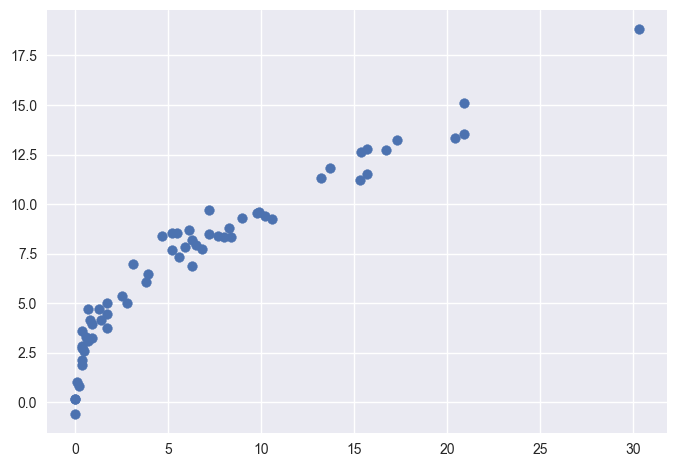

In [51]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

ElasticNetR = ElasticNet(alpha=2)

ElasticNetR.fit(x_train_scaled, y_train)

y_pred = ElasticNetR.predict(x_test_scaled)

mse =  mean_squared_error(y_true=y_test, y_pred=y_pred)

Score = r2_score(y_pred=y_pred, y_true=y_test)

print(f'The Accuracy of the Linear Regression : {Score} and the loss {mse}')

plt.scatter(x=y_test, y=y_pred)

In [52]:
ElasticNetR.coef_

array([ 0.26645253, -0.42414148,  0.        , -0.        ,  0.49681873,
        1.72804432,  1.72304116, -0.78378035,  0.        ])

The Accuracy of the Linear Regression : 0.982086748380061 and the loss 0.7928502411726381


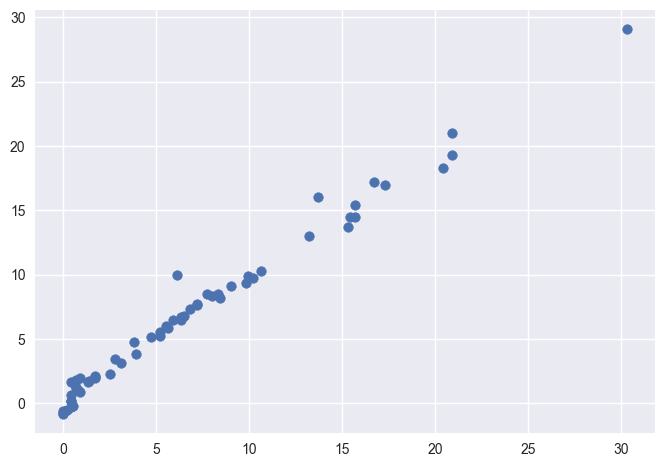

In [53]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

LassoCVR = LassoCV(alphas=1000, cv=2)

LassoCVR.fit(x_train_scaled, y_train)

y_pred = LassoCVR.predict(x_test_scaled)

mse =  mean_squared_error(y_true=y_test, y_pred=y_pred)

Score = r2_score(y_pred=y_pred, y_true=y_test)

print(f'The Accuracy of the Linear Regression : {Score} and the loss {mse}')

plt.scatter(x=y_test, y=y_pred)

The Accuracy of the Linear Regression : 0.9834170372575439 and the loss 0.7339709332882098


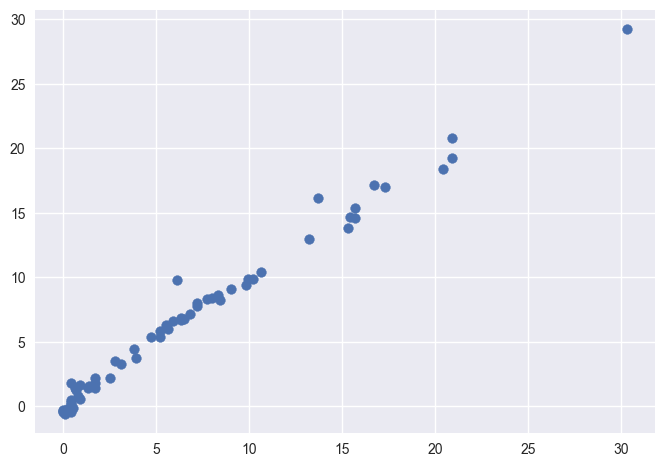

In [54]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

RidgeCVR = RidgeCV(alphas=np.arange(0.01,100,0.1))

RidgeCVR.fit(x_train_scaled, y_train)

y_pred = RidgeCVR.predict(x_test_scaled)

mse =  mean_squared_error(y_true=y_test, y_pred=y_pred)

Score = r2_score(y_pred=y_pred, y_true=y_test)

print(f'The Accuracy of the Linear Regression : {Score} and the loss {mse}')

plt.scatter(x=y_test, y=y_pred)

The Accuracy of the Linear Regression : 0.9843344968150742 and the loss 0.6933636752154009


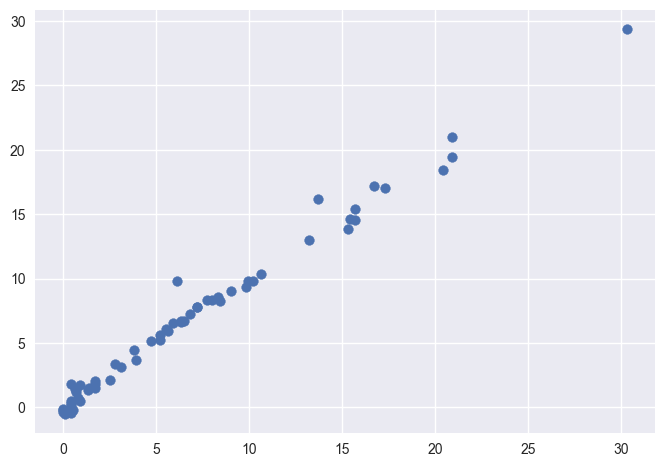

In [55]:
from sklearn.linear_model import ElasticNetCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

ElasticNetCVR = ElasticNetCV(alphas=np.arange(0.01,10,0.1),l1_ratio=0.7)

ElasticNetCVR.fit(x_train_scaled, y_train)

y_pred = ElasticNetCVR.predict(x_test_scaled)

mse =  mean_squared_error(y_true=y_test, y_pred=y_pred)

Score = r2_score(y_pred=y_pred, y_true=y_test)

print(f'The Accuracy of the Linear Regression : {Score} and the loss {mse}')

plt.scatter(x=y_test, y=y_pred)

In [56]:
ElasticNetCVR.alpha_

np.float64(0.01)

In [ ]:
import pickle

pickle.dump(scalar, open('Scalar.pkl','wb'))
pickle.dump(RidgeCVR, open('Ridge.pkl','wb'))